## Preprocessing and load data

In [9]:
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
from SVHNDataset import SVHNDataset

svhn = SVHNDataset()
path_train  = '/Users/hkromer/02_PhD/02_Data/12.dcr/Stanford_housenumbers/train_32x32.mat'
path_test  = '/Users/hkromer/02_PhD/02_Data/12.dcr/Stanford_housenumbers/test_32x32.mat'

train_data, train_labels, test_data, test_labels = svhn.load_dataset(path_train, path_test)
# convert to grayscale
train_data = svhn.convert_to_gray(train_data)
test_data = svhn.convert_to_gray(test_data)
print(' ')
print('After conversion to grayscale: ')
print(f'Train data: {train_data.shape}, labels: {train_labels.shape}')
print(f'Test data: {test_data.shape}, labels: {test_labels.shape}')

X_train = svhn.preprocess_for_KERAS_reshaping(32, train_data)
X_test = svhn.preprocess_for_KERAS_reshaping(32, test_data)
print(' ')
print('After preprocessing reshaping: ')
print(f'X_train data: {X_train.shape}')
print(f'X_test data: {X_test.shape}')

y_train = svhn.preprocess_for_KERAS_labels(train_labels)
y_test = svhn.preprocess_for_KERAS_labels(test_labels)
print(' ')
print('After preprocessing labels: ')
print(f'Train labels: {y_train.shape}')
print(f'Test  labels: {y_test.shape}')

Train data: (32, 32, 3, 73257) , Train labels: (73257, 1)
Test data: (32, 32, 3, 26032) , Test labels: (26032, 1)
 
After conversion to grayscale: 
Train data: (32, 32, 73257), labels: (73257, 1)
Test data: (32, 32, 26032), labels: (26032, 1)
 
After preprocessing reshaping: 
X_train data: (73257, 32, 32, 1)
X_test data: (26032, 32, 32, 1)
 
After preprocessing labels: 
Train labels: (73257,)
Test  labels: (26032,)


## Load KERAS model

In [5]:
import tensorflow as tf
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' # otherwise there will be an error

model = tf.keras.models.load_model('/Users/hkromer/02_PhD/02_Data/12.dcr/Stanford_housenumbers/2019-19-21.KERAS_model.h5')

### Make a prediction on a few examples and plot

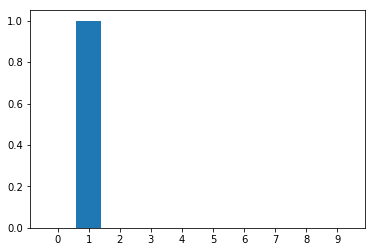

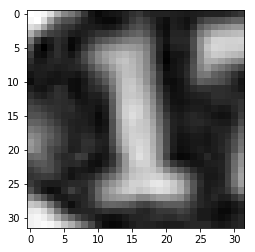

1


In [43]:
# ii = 92 # 92 is wrong
ii = 97

examples = X_test[ii,:,:]
examples = examples.astype(np.float64)
examples = examples.reshape(-1,32,32,1)
y_predict = model.predict(examples)[0]
y_example = y_test[ii]
X = [a for a in range(0,len(y_predict))]

plt.bar(X,y_predict)
plt.xticks(np.arange(0,10,1))
plt.show()


examples=examples.reshape(32,32)
plt.imshow(examples,cmap='gray')
plt.show()
print(y_example)